<a href="https://colab.research.google.com/github/HWMV/Machine_Learning/blob/main/Machine_Learning6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 선형 회귀
* 선형회귀
  * 단순 선형 회귀 : 독린변수(피처)가 1개
  * 다중 선형 회귀 : 독립변수(피처)가 2개
* 비용함수 (Cost function)
  * 손실함수(Loss), 목적함수(Objectivie)
  (그래프 : 모델과 값의 거리 구하기)
  * 오차(error)를 계산(실제값과 예측값 차이)
  * 평균 제곱 오차를 최소화하는 파라미터 찾음
* 경사하강법 (Gradient Descent)
  * 경사하강법을 활용해 최소 에러 값을 찾음
  (2차 그래프에서 미분을 통한 지점 별 기울기로 구하는 법. 0에 수렴할 수록 좋음)

In [3]:
# 지도 학습(회귀)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# 데이터 불러오기
from sklearn.datasets import load_diabetes

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    x_train, x_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1),
        df['target'],
        test_size=0.2,
        random_state=1004
    )
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = make_dataset()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [9]:
# train 샘플
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [10]:
# target 샘플
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

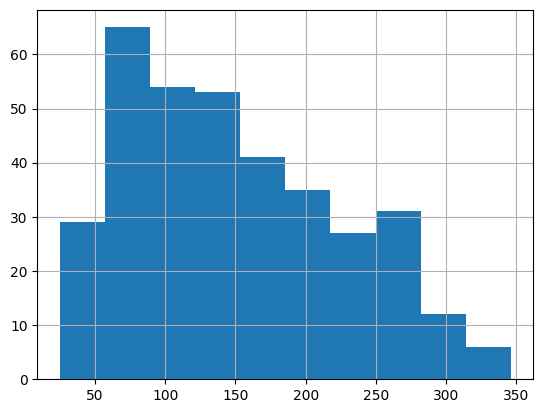

In [11]:
# target 확인
y_train.hist()

선형 회귀

In [13]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
mean_squared_error(y_test, pred)    # mse로 평가해보기

2707.6318521641583